In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# read csv file with data
igaba = pd.read_csv("20210820_all_plates.csv")
igaba.head()

,Plate,Well,F0,Fmax,DFF
0,M0029,A01,15261,19712,0.291658
1,M0029,A02,5778,19019,2.291623
2,M0029,A03,895,7386,7.252514
3,M0029,A04,453,5782,11.763797
4,M0029,A05,776,7635,8.838918


In [57]:
# add a column that denotes whether data was noisy (1=noisy, 0=good)
# 5/17/21: increased stringency of noise criteria to 2000 raw fluorescence. 
#igaba.loc[(igaba["F0"]>1000)|(igaba["Fmax"]>8999), 'Noisy'] = 0
#igaba.loc[(igaba["F0"]<1000)&(igaba["Fmax"]<9000), 'Noisy'] = 1
igaba.loc[(igaba["F0"]>1000), 'Noisy'] = 0
igaba.loc[(igaba["F0"]<1000), 'Noisy'] = 1
igaba

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0029,A01,15261,19712,0.291658,0.0
1,M0029,A02,5778,19019,2.291623,0.0
2,M0029,A03,895,7386,7.252514,1.0
3,M0029,A04,453,5782,11.763797,1.0
4,M0029,A05,776,7635,8.838918,1.0
5,M0029,A06,4838,14842,2.067797,0.0
6,M0029,A07,893,8440,8.451288,1.0
7,M0029,A08,859,9654,10.238650,1.0
8,M0029,A09,3871,13201,2.410230,0.0
9,M0029,A10,642,8060,11.554517,1.0


In [58]:
# Select control wells
ctrls = igaba[igaba["Well"].isin(["A01","B01","C01"])]
ctrls

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0029,A01,15261,19712,0.291658,0.0
12,M0029,B01,20282,25528,0.258653,0.0
24,M0029,C01,18681,23989,0.284139,0.0
96,M0030,A01,13277,17691,0.332455,0.0
108,M0030,B01,13814,18347,0.328145,0.0
120,M0030,C01,15169,19899,0.311820,0.0
192,M0031,A01,8655,12541,0.448989,0.0
204,M0031,B01,12572,17158,0.364779,0.0
216,M0031,C01,9334,13306,0.425541,0.0
288,M0032,A01,24892,32744,0.315443,0.0


In [59]:
plate1 = igaba[igaba["Plate"]=="M0029"]
plate2 = igaba[igaba["Plate"]=="M0030"]
plate3 = igaba[igaba["Plate"]=="M0031"]
plate4 = igaba[igaba["Plate"]=="M0032"]
plate5 = igaba[igaba["Plate"]=="M0033"]
plate6 = igaba[igaba["Plate"]=="M0034"]
plate7 = igaba[igaba["Plate"]=="M0035"]
plate8 = igaba[igaba["Plate"]=="M0036"]
#plate9 = igaba[igaba["Plate"]=="M0019"]
#plate10 = igaba[igaba["Plate"]=="M0020"]

In [60]:
# find average DFF of control wells in each plate
plate1_ctrls = ctrls[ctrls["Plate"]=="M0029"]
plate1_ctrl_dff = plate1_ctrls["DFF"].mean()

plate2_ctrls = ctrls[ctrls["Plate"]=="M0030"]
plate2_ctrl_dff = plate2_ctrls["DFF"].mean()

plate3_ctrls = ctrls[ctrls["Plate"]=="M0031"]
plate3_ctrl_dff = plate3_ctrls["DFF"].mean()

plate4_ctrls = ctrls[ctrls["Plate"]=="M0032"]
plate4_ctrl_dff = plate4_ctrls["DFF"].mean()

plate5_ctrls = ctrls[ctrls["Plate"]=="M0033"]
plate5_ctrl_dff = plate5_ctrls["DFF"].mean()

plate6_ctrls = ctrls[ctrls["Plate"]=="M0034"]
plate6_ctrl_dff = plate6_ctrls["DFF"].mean()

plate7_ctrls = ctrls[ctrls["Plate"]=="M0035"]
plate7_ctrl_dff = plate7_ctrls["DFF"].mean()

plate8_ctrls = ctrls[ctrls["Plate"]=="M0036"]
plate8_ctrl_dff= plate8_ctrls["DFF"].mean()

#plate9_ctrls = ctrls[ctrls["Plate"]=="M0019"]
#plate9_ctrl_dff = plate9_ctrls["DFF"].mean()

#plate10_ctrls = ctrls[ctrls["Plate"]=="M0020"]
#plate10_ctrl_dff = plate10_ctrls["DFF"].mean()

In [61]:
# make a list of all values that pass the noise test.
allPlates_goodF = igaba[igaba["Noisy"]==0]
allPlates_goodF

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0029,A01,15261,19712,0.291658,0.0
1,M0029,A02,5778,19019,2.291623,0.0
5,M0029,A06,4838,14842,2.067797,0.0
8,M0029,A09,3871,13201,2.410230,0.0
11,M0029,A12,7366,15532,1.108607,0.0
12,M0029,B01,20282,25528,0.258653,0.0
13,M0029,B02,10099,16909,0.674324,0.0
14,M0029,B03,2038,9293,3.559863,0.0
16,M0029,B05,6753,13001,0.925218,0.0
18,M0029,B07,1837,14576,6.934676,0.0


In [62]:
# sort good data by descending DFF
# pick out the top 20 highest DFF wells
allPlates_goodF_sorted = allPlates_goodF.sort_values(by=["DFF"],ascending=False)
tophits = allPlates_goodF_sorted.head(20)

# filter out DFF values less than 2
tophits = tophits[tophits["DFF"]>=2]
print('*** Top hits sorted by DFF ***')
tophits
tophits.to_csv('Round_04_tophits_sorted_by_DFF.csv')

*** Top hits sorted by DFF ***


In [63]:
# sort the hit list by plate number
tophits_byPlate = tophits.sort_values(by=["Plate"])
print('*** Top hits sorted by Plate ***')
tophits_byPlate
tophits_byPlate.to_csv('Round_04_tophits_sorted_by_PLATE.csv')

*** Top hits sorted by Plate ***


In [64]:
# GRAPHS
# Make a list of 96 wells for x-axis (0-95)
numwells = igaba.shape
wellidx = list(range(96))

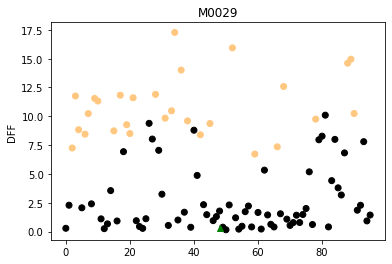

In [65]:
#All plates: black dots have good F values, orange dots are "Noisy",
#and the green triangle shows the average DFF of the control wells.

#Plate 1
plt.scatter(wellidx,plate1["DFF"],c=plate1["Noisy"],cmap='copper')
plt.plot(48,plate1_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0029')
plt.savefig('M0029.png')

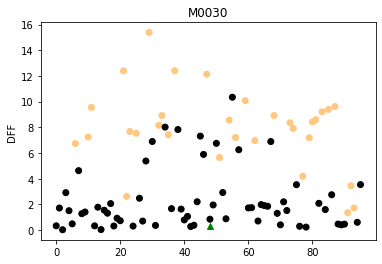

In [66]:
#Plate 2
plt.scatter(wellidx,plate2["DFF"],c=plate2["Noisy"],cmap="copper")
plt.plot(48,plate2_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0030')
plt.savefig('M0030.png')

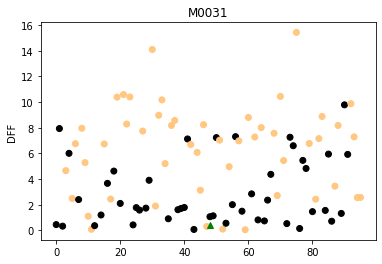

In [67]:
#Plate 3
plt.scatter(wellidx,plate3["DFF"],c=plate3["Noisy"],cmap="copper")
plt.plot(48,plate3_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0031')
plt.savefig('M0031.png')

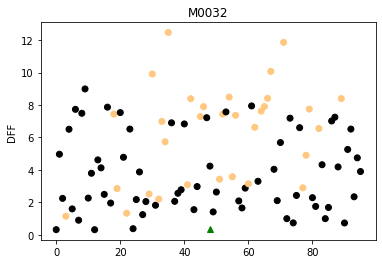

In [68]:
#Plate 4
plt.scatter(wellidx,plate4["DFF"],c=plate4["Noisy"],cmap="copper")
plt.plot(48,plate4_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0032')
plt.savefig('M0032.png')

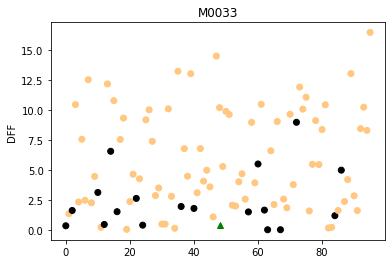

In [69]:
#Plate 5
plt.scatter(wellidx,plate5["DFF"],c=plate5["Noisy"],cmap="copper")
plt.plot(48,plate5_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0033')
plt.savefig('M0033.png')

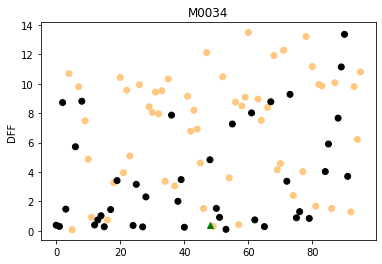

In [70]:
#Plate 6
plt.scatter(wellidx,plate6["DFF"],c=plate6["Noisy"],cmap="copper")
plt.plot(48,plate6_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0034')
plt.savefig('M0034.png')

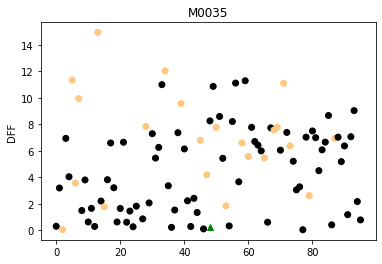

In [71]:
#Plate 7
plt.scatter(wellidx,plate7["DFF"],c=plate7["Noisy"],cmap="copper")
plt.plot(48,plate7_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0035')
plt.savefig('M0035.png')

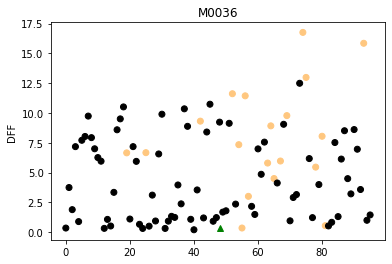

In [72]:
#Plate 8
plt.scatter(wellidx,plate8["DFF"],c=plate8["Noisy"],cmap="copper")
plt.plot(48,plate8_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0036')
plt.savefig('M0036.png')